In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits


In [3]:
hdulist = fits.open('data/allStarLite-dr17-synspec_rev1.fits')


In [4]:
hdu1_data = hdulist[1].data
df_c = pd.DataFrame(hdu1_data.tolist(), columns=hdu1_data.names)

In [5]:
# keep 10 rows TODO : REMOVE for the real pipeline
df_c = df_c.head(10)

In [12]:
# save the data to a csv file
# df_c.to_csv('data/allStarLite-dr17-synspec_rev1.csv', index=False)


In [32]:
df = df_c # used a src backup since df_c takes 5 minutes to load

In [33]:
# drop 1st row (calibration)
df = df.drop(0)

# subset all chemical abundances (collumn name contain "_FE")
chemical_subset = df.filter(regex='_FE', axis=1) 

# merge with + df.filter(regex='_H', axis=1)
chemical_subset = pd.concat([chemical_subset, df.filter(regex='_H', axis=1)], axis=1)

to_remove_from_chemicals = ['RV_FEH', 'MIN_H', 'MAX_H', 'GAIAEDR3_R_HI_GEO', 'GAIAEDR3_R_HI_PHOTOGEO','CU_FE_ERR',
                            'P_FE_ERR','P_FE_FLAG',
                            'CU_FE_FLAG',
                            'M_H', 'M_H_ERR', 'X_H_SPEC', 'X_H', 'X_H_ERR']
chemical_subset = chemical_subset.drop(to_remove_from_chemicals, axis=1)

# create a df without the chemical abundances
df = df.drop(chemical_subset.columns, axis=1)

to_remove_from_main_dataset = ['P_FE_ERR',
'P_FE_FLAG',
'CU_FE_ERR', 'GAIAEDR3_PARALLAX_ERROR', 'GAIAEDR3_PMRA', 'GAIAEDR3_PMRA_ERROR',
'GAIAEDR3_PMDEC', 'GAIAEDR3_PMDEC_ERROR', 'GAIAEDR3_PHOT_G_MEAN_MAG',
'GAIAEDR3_PHOT_BP_MEAN_MAG', 'GAIAEDR3_PHOT_RP_MEAN_MAG',
'GAIAEDR3_DR2_RADIAL_VELOCITY', 'GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR',
'GAIAEDR3_R_MED_GEO', 'GAIAEDR3_R_LO_GEO', 'GAIAEDR3_R_HI_GEO',
'GAIAEDR3_R_MED_PHOTOGEO', 'GAIAEDR3_R_LO_PHOTOGEO',
'GAIAEDR3_R_HI_PHOTOGEO','MEANFIB', 'SIGFIB','AK_TARG', 'AK_TARG_METHOD',
'APOGEE_TARGET1', 'APOGEE_TARGET2', 'APOGEE2_TARGET1',
'APOGEE2_TARGET2', 'APOGEE2_TARGET3', 'APOGEE2_TARGET4',
'RV_CHI2','RV_CCFWHM', 'RV_AUTOFWHM','VSCATTER', 'VERR', 'RV_FEH', 'RV_FLAG', 'MIN_H', 'MAX_H',
'MIN_JK', 'MAX_JK', 'GAIAEDR3_SOURCE_ID', 'GAIAEDR3_PARALLAX',
'ASPCAP_GRID', 'ASPCAP_CHI2','FRAC_BADPIX','FRAC_LOWSNR', 'FRAC_SIGSKY',
'ELEM_CHI2', 'ELEMFRAC', 'EXTRATARG', 'MEMBERFLAG', 'MEMBER','X_H_SPEC', 'X_M_SPEC',
'FRAC_BADPIX','FRAC_LOWSNR', 'FRAC_SIGSKY','ELEM_CHI2', 'ELEMFRAC',
'X_H_SPEC', 'X_M_SPEC','TEFF_SPEC', 'LOGG_SPEC','CU_FE_FLAG', 'ALT_ID', 'PROGRAMNAME', 
'RV_TEFF', 'RV_LOGG', 'RV_ALPHA', 'RV_CARB', 'SNREV', 'SFD_EBV', 'N_COMPONENTS']

df = df.drop(to_remove_from_main_dataset, axis=1)


chemical_subset = chemical_subset[chemical_subset.columns.drop(list(chemical_subset.filter(regex='_SPEC')))]

# remove collumns with 100% NaN values
chemical_subset = chemical_subset.dropna(axis=1, how='all')

chemical_subset_err = chemical_subset.filter(regex='_ERR', axis=1) 
chemical_subset_flag = chemical_subset.filter(regex='_FLAG', axis=1) 

# remove _ERR and _FLAG from chemical_subset
chemical_subset = chemical_subset.drop(chemical_subset_err.columns, axis=1)
chemical_subset = chemical_subset.drop(chemical_subset_flag.columns, axis=1)


# parse the list of all chemical elements in the dataset

chemical_elements = [x.split('_')[0] for x in chemical_subset.columns]

In [34]:
display(df.columns)
display(chemical_subset.columns)
display(chemical_subset_err.columns)
display(chemical_subset_flag.columns)
display(chemical_elements)

Index(['APOGEE_ID', 'TELESCOPE', 'FIELD', 'RA', 'DEC', 'GLON', 'GLAT', 'J',
       'J_ERR', 'H', 'H_ERR', 'K', 'K_ERR', 'AK_WISE', 'TARGFLAGS', 'SURVEY',
       'NVISITS', 'SNR', 'STARFLAG', 'STARFLAGS', 'ANDFLAG', 'ANDFLAGS',
       'VHELIO_AVG', 'PARAMFLAG', 'ASPCAPFLAG', 'ASPCAPFLAGS', 'X_H',
       'X_H_ERR', 'X_M', 'X_M_ERR', 'TEFF', 'TEFF_ERR', 'LOGG', 'LOGG_ERR',
       'M_H', 'M_H_ERR', 'ALPHA_M', 'ALPHA_M_ERR', 'VMICRO', 'VMACRO',
       'VSINI'],
      dtype='object')

Index(['C_FE', 'CI_FE', 'N_FE', 'O_FE', 'NA_FE', 'MG_FE', 'AL_FE', 'SI_FE',
       'S_FE', 'K_FE', 'CA_FE', 'TI_FE', 'TIII_FE', 'V_FE', 'CR_FE', 'MN_FE',
       'CO_FE', 'NI_FE', 'CE_FE', 'FE_H'],
      dtype='object')

Index(['C_FE_ERR', 'CI_FE_ERR', 'N_FE_ERR', 'O_FE_ERR', 'NA_FE_ERR',
       'MG_FE_ERR', 'AL_FE_ERR', 'SI_FE_ERR', 'S_FE_ERR', 'K_FE_ERR',
       'CA_FE_ERR', 'TI_FE_ERR', 'TIII_FE_ERR', 'V_FE_ERR', 'CR_FE_ERR',
       'MN_FE_ERR', 'CO_FE_ERR', 'NI_FE_ERR', 'CE_FE_ERR', 'FE_H_ERR'],
      dtype='object')

Index(['C_FE_FLAG', 'CI_FE_FLAG', 'N_FE_FLAG', 'O_FE_FLAG', 'NA_FE_FLAG',
       'MG_FE_FLAG', 'AL_FE_FLAG', 'SI_FE_FLAG', 'S_FE_FLAG', 'K_FE_FLAG',
       'CA_FE_FLAG', 'TI_FE_FLAG', 'TIII_FE_FLAG', 'V_FE_FLAG', 'CR_FE_FLAG',
       'MN_FE_FLAG', 'CO_FE_FLAG', 'NI_FE_FLAG', 'CE_FE_FLAG', 'FE_H_FLAG'],
      dtype='object')

['C',
 'CI',
 'N',
 'O',
 'NA',
 'MG',
 'AL',
 'SI',
 'S',
 'K',
 'CA',
 'TI',
 'TIII',
 'V',
 'CR',
 'MN',
 'CO',
 'NI',
 'CE',
 'FE']

In [39]:
engine = create_engine(DATABASE_URL)

Base.metadata.create_all(engine)

Session = sessionmaker(bind=engine)
session = Session()

In [47]:
def insert_data_to_db(session, df, chemical_subset, chemical_subset_err, chemical_subset_flag, chemical_elements):
    # Ajout des télescopes (Telescope)
    for telescope_name in df['TELESCOPE'].unique():
        if not session.query(Telescope).filter_by(telescope_name=telescope_name).first():
            session.add(Telescope(telescope_name=telescope_name))

    # Ajout des enquêtes (Survey)
    for survey_name in df['SURVEY'].unique():
        if not session.query(Survey).filter_by(survey_name=survey_name).first():
            session.add(Survey(survey_name=survey_name))
    session.commit()

    # Ajout des coordonnées (Coordinates)
    coordinates_map = {}
    for _, row in df.iterrows():
        coordinates = session.query(Coordinates).filter_by(
            right_ascension=row['RA'], declination=row['DEC']
        ).first()
        if not coordinates:
            coordinates = Coordinates(
                right_ascension=row['RA'], declination=row['DEC'], field=row['FIELD']
            )
            session.add(coordinates)
            session.commit()
        coordinates_map[row['APOGEE_ID']] = coordinates.coordinates_id

    # Ajout des données chimiques (Chemical)
    chemical_map = {}
    for chemical_name, fe_column in zip(chemical_elements, chemical_subset.columns):
        chemical = session.query(Chemical).filter_by(name=chemical_name).first()
        if not chemical:
            chemical = Chemical(
                name=chemical_name,
                value=chemical_subset[fe_column].mean(),  # Exemple : moyenne comme valeur globale
                error=chemical_subset_err[fe_column + '_ERR'].mean(),  # Exemple : moyenne des erreurs
                flag=";".join(map(str, chemical_subset_flag[fe_column + '_FLAG'].unique())),
                family="metal" if "FE" in fe_column else "non-metal",
            )
            session.add(chemical)
            session.commit()
        chemical_map[chemical_name] = chemical.chemical_id

    # Ajout des étoiles (Star)
    for _, row in df.iterrows():
        telescope = session.query(Telescope).filter_by(telescope_name=row['TELESCOPE']).first()
        survey = session.query(Survey).filter_by(survey_name=row['SURVEY']).first()
        coordinates_id = coordinates_map[row['APOGEE_ID']]
        
        star = session.query(Star).filter_by(apogee_id=row['APOGEE_ID']).first()
        if not star:
            star = Star(
                apogee_id=row['APOGEE_ID'],
                telescope_id=telescope.telescope_id,
                survey_id=survey.survey_id,
                coordinates_id=coordinates_id,
                photometry_id=None,  # À définir si nécessaire
                nb_observations=row['NVISITS'],
                temperature_avg=row['TEFF'],
                metallicity_avg=row['M_H'],
                gravity_avg=row['LOGG'],
                nb_error_flag=row['STARFLAG'],  # Exemple d'utilisation de STARFLAG
                ak_wise=row['AK_WISE'],
                vsini=row['VSINI'],
                vhelio=row['VHELIO_AVG'],
                vmicro=row['VMICRO'],
                vmacro=row['VMACRO'],
                alpha_m=row['ALPHA_M'],
                alpha_m_err=row['ALPHA_M_ERR'],
                snr=row['SNR'],
                logg_err=row['LOGG_ERR'],
                teff_err=row['TEFF_ERR'],
                m_h_err=row['M_H_ERR'],
            )
            session.add(star)

    session.commit()

    print("Données insérées avec succès.")


In [46]:

insert_data_to_db(session, df, chemical_subset, chemical_subset_err, chemical_subset_flag, chemical_elements)


Erreur détectée : (psycopg2.errors.InFailedSqlTransaction) current transaction is aborted, commands ignored until end of transaction block

[SQL: SELECT db_proj.telescope.telescope_id AS db_proj_telescope_telescope_id, db_proj.telescope.telescope_name AS db_proj_telescope_telescope_name 
FROM db_proj.telescope 
WHERE db_proj.telescope.telescope_name = %(telescope_name_1)s 
 LIMIT %(param_1)s]
[parameters: {'telescope_name_1': 'apo25m', 'param_1': 1}]
(Background on this error at: https://sqlalche.me/e/20/2j85)


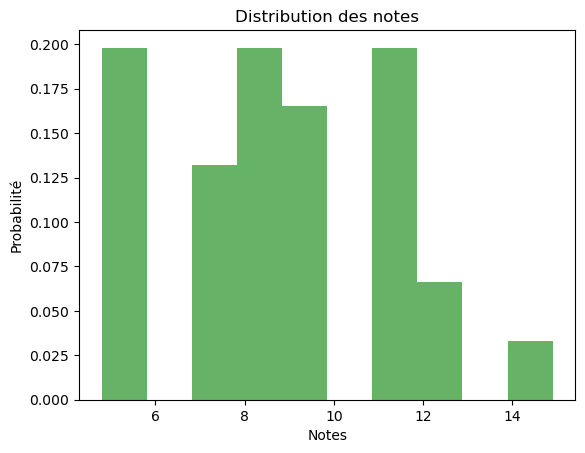

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data = [4.8, 4.9, 4.9, 5.3, 5.7, 5.8, 6.9, 7, 7.1, 7.2, 8, 8.2, 8.3, 8.5, 8.7, 
        8.8, 9.1, 9.1, 9.2, 9.6, 11.5, 11.6, 11.6, 11.8, 11.8, 11.8, 12.2, 12.6, 14.9, 8.86]

# plot distribution des notes

plt.hist(data, bins=10, density=True, alpha=0.6, color='g')
plt.title('Distribution des notes')
plt.xlabel('Notes')
plt.ylabel('Probabilité')
plt.show()
